# Final Report - Classification Project

- Nathan Sharick

---

### Project Goals
- Goal 1: Find drivers of churn for Telco customers

- Goal 2: Develop a machine learning model that accurately predicts customer churn

### Project Description
- The project will include data acquisition, data cleaning / wrangling, data exploration, machine learning modeling for predicting customer churn, and predictions of customer churn based on the current telco dataset

- The project wil conclude with a final report that summarizes the project's findings, including the code necessary to replicate the findings, and a .csv file with predictions of churn based on the best performing model



### Imports

In [1]:
#import python libraries for overall notebook/script functionality
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#import machine learning model libraries from sklearn for the modeling stage of the project
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression

#import warnings filter to keep the final report notebook for being cluttered
import warnings
warnings.filterwarnings('ignore')

#import the dataset acquisition function from the acquire.py file
from acquire import get_telco_data

#import the data preparation function from the prepare.py file
from prepare import prep_telco


### Data Acquisition and Data Cleaning

##### Acquiring the project dataset
- The function for acquiring the data for this project is in the included acquire.py file

- The acquire function is named "get_telco_data" and has the following attributes:

    - It defines the .csv filename as 'telco.csv'
    
    - It checks to see if there is already a copy of the telco.csv in the current working directory
    
    - If there is already a copy in the local directory it reads that file into the notebook
    
    - If there is not already a copy in the directory it runs a sql query to pull and join all four tables of telco data from the database 
    
    - After pulling the dataset from the database the function saves a copy of the 'telco.csv' file to the working directory so that all future calls will pull from the local file
   
- The acquire.py file has all the needed imports to run including numpy, pandas, os, the env file with databse access credentials, and the get_db_url function used to access the database.


In [2]:
#use the get_telco_data function to pull the dataset
df = get_telco_data()
#view the first five rows of data
df.head()

Reading from csv file...


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


##### Cleaning and Splitting the project dataset
- The data preparation function for this project is located in the included prepare.py file

- The data preparation function is called 'prep_telco' and has the following attributes:

    - It first deals with the white space cells in the 'total_charges' column by replacing them with the numpy special character 'NaN' and casting it as a float data type so that python can run calls on the column without having a data type descrepancy.
    
    - It drops the three foregin key id columns ('payment_type_id', 'internet_service_type_id', 'contract_type_id') that were part of the relational database tables but are not needed for the project.
    
    - It modifies the 'churn' column by changing the string values to integer values ('yes' to 1 and 'no' to 0) so that python can run computations on the column
    
    - It encodes the categorical columns using pandas by creating bianary dummie variables that can be used with machine learning models
    
    - It renames the encode columns for payment type because the concatenated column titles included parenthesis which cause problems when writing them into python code
    
    - It then splits the dataset by rows into three parts (train, validate, and test) so that the data exploration, model development, and model training can be done with the train set, then the models can be evaluated with a new set of observations (validate), and the final machine learning model can be tested with the third set of observaitons (test) this helps prevent overfitting the model and helps the model accurately generalize to new data moving forward.
    
- The prep_telco function splits the data into 80% for the train/validate set and 20% for the test set then splits the train/validate set into 70% for train and 30% for validate

In [3]:
#use the prep_telco function from the prepare.py (imported above) to clean and split the data
train, validate, test = prep_telco(df)
#verify the data split
train.shape, validate.shape, test.shape

((3943, 47), (1691, 47), (1409, 47))

In [4]:
#view the first 5 rows of the train set to verify the cleaned data
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,pay_credit,pay_elec,pay_mail
5310,7503-MIOGA,Female,1,Yes,No,72,Yes,Yes,Yes,Yes,...,0,1,1,0,1,0,0,0,0,0
3790,5329-KRDTM,Male,1,Yes,No,72,Yes,Yes,No,Yes,...,0,0,0,0,1,0,0,1,0,0
4398,6199-IWKGC,Female,1,Yes,No,46,Yes,Yes,No,No,...,0,1,0,1,0,1,0,0,1,0
2635,3748-FVMZZ,Male,0,No,No,4,No,No phone service,No,No,...,0,1,1,0,0,0,0,0,1,0
2986,4280-DLSHD,Male,0,Yes,No,8,Yes,No,No,Yes,...,0,0,1,0,0,0,0,0,0,1


### Data Exploration

**Question 1** - Is the customer's choice of payment type related to customer churn?

##### Visualize the data

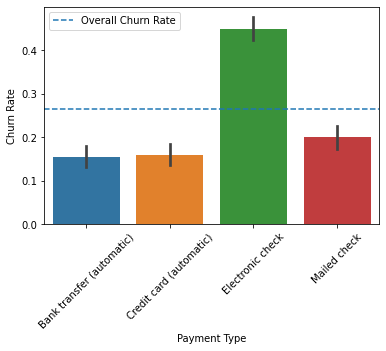

In [5]:
#assign a variable for the overall customer churn rate
churn_mean = train.churn.mean()
#create a bar plot with payment type as the x axis, churn rate as the y axis 
#and mean churn rate for each category displayed by the bars
sns.barplot(x='payment_type', y='churn', data=train)
#add the overall churn value as a line across the bars for comparison
plt.axhline(churn_mean, label='Overall Churn Rate', linestyle='--')
#set the plot labels
plt.ylabel('Churn Rate')
plt.xlabel('Payment Type')
#rotate the bar labels so the long labels can be read
plt.xticks(rotation=45)
#show the plot legend
plt.legend()
#show the plot
plt.show()
#the whiskers on top of the bar represent a confidence interval calculated by seaborn

**Hypothesis:**

- H0: Payment type is independent of customer churn

- Ha: Payment type is not independent of customer churn

##### Statistical testing - Chi-2

In [6]:
#cross tabulate the data so relational comparisons can be made
pay_cross = pd.crosstab(train.churn, train.payment_type)
#view the cross tabulated data
pay_cross

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
churn,,,,
0,738,727,731,701
1,135,138,597,176


In [7]:
#run the chi-2 test on the above cross tabulated data
chi2, p, degf, expected = stats.chi2_contingency(pay_cross)
#print the results
print('Observed\n')
print(pay_cross.values)
print('-------------------\nExpected\n')
print(expected.astype(int))
print('-------------------\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('-------------------\n')
alpha = 0.01
if p < alpha:
    print('We reject the null hypothesis because payment type is not independent of customer churn')

Observed

[[738 727 731 701]
 [135 138 597 176]]
-------------------
Expected

[[641 635 975 644]
 [231 229 352 232]]
-------------------

chi^2 = 354.5801
p     = 0.0000
-------------------

We reject the null hypothesis because payment type is not independent of customer churn



**Question 1 Takeaways:**
- Customers with the electronic check payment method had a higher churn rate than those with other payment methods and a higher churn rate than the overall customer churn rate.

- Statistical testing showed that customer payment type is not independent of customer churn rate

---

**Question 2** - Is the customer's internet service type related to customer churn

##### Visualize the data

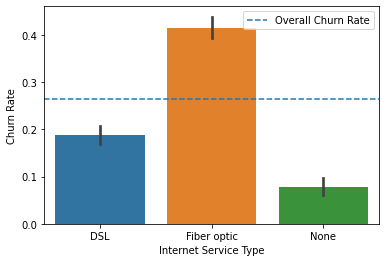

In [8]:
#assign a variable for the overall customer churn rate
churn_mean = train.churn.mean()
#create a barplot with internet service type on the x axis, churn rate on the y axis 
#and mean churn rate for each category displayed by the bars
sns.barplot(x='internet_service_type', y='churn', data=train)
#add the overall churn value as a line across the bars for comparison
plt.axhline(churn_mean, label='Overall Churn Rate', linestyle='--')
#add labels to the x and y axis
plt.ylabel('Churn Rate')
plt.xlabel('Internet Service Type')
#show the plot legend
plt.legend()
#show the plot
plt.show()
#the whiskers on top of the bar represent a confidence interval calculated by seaborn

**Hypothesis:**

- H0: Internet service type is independent of customer churn

- Ha: Internet service type is not independent of customer churn

##### Statistical testing - Chi-2

In [9]:
#cross tabulate the data so relational comparisons can be made
internet_cross = pd.crosstab(train.churn, train.internet_service_type)
#view the cross tabulated data
internet_cross

internet_service_type,DSL,Fiber optic,None
churn,,,
0,1095,1019,783
1,254,726,66


In [10]:
#run the chi-2 test on the above cross tabulated data
chi2, p, degf, expected = stats.chi2_contingency(internet_cross)
#print the results
print('Observed\n')
print(internet_cross.values)
print('-------------------\nExpected\n')
print(expected.astype(int))
print('-------------------\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('-------------------\n')
alpha = 0.01
if p < alpha:
    print('We reject the null hypothesis because internet service type is not independent of customer churn')

Observed

[[1095 1019  783]
 [ 254  726   66]]
-------------------
Expected

[[ 991 1282  623]
 [ 357  462  225]]
-------------------

chi^2 = 397.7389
p     = 0.0000
-------------------

We reject the null hypothesis because internet service type is not independent of customer churn



**Question 2 Takeaways:**
- Customers with fiber optic internet service had a higher curn rate than those with other internet service types and a higher churn rate than the overall customer churn rate

- Statistical testing showed that customer internet service type is not independent of customer churn rate

---

**Question 3** - Is customer participation in our support and back up programs related to customer churn

##### Visualize the data

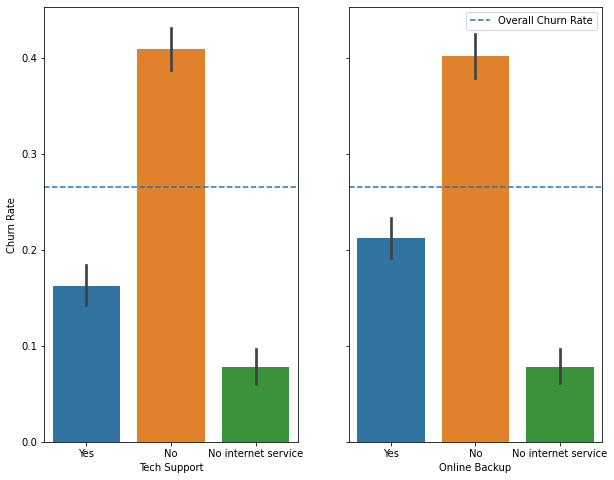

In [11]:
#assign a variable for the overall customer churn rate
churn_mean = train.churn.mean()
#create subplots so two plots can be displayed side by side
fig, ax = plt.subplots(ncols=2, sharey=True, figsize = (10,8))
#create a barplot with tech support participation on the x axis and churn rate on the y axis
sns.barplot(x='tech_support', y='churn', data=train, ax=ax[0])
#create a barplot with online backup participation on the x axis and churn rate in the y axis
sns.barplot(x='online_backup', y='churn', data=train, ax=ax[1])
#add overall churn rate lines to both plots
ax[0].axhline(churn_mean, label='Overall Churn Rate', linestyle='--')
plt.axhline(churn_mean, label='Overall Churn Rate', linestyle='--')
#add axis labels to both plots
ax[0].set_xlabel('Tech Support')
ax[0].set_ylabel('Churn Rate')
plt.xlabel('Online Backup')
plt.ylabel('')
#show the plot legend
plt.legend()
#show the plot
plt.show()

**Hypothesis:**

- H0: Customer participation in our support and backup programs is independent of customer churn

- Ha: customer participation in our support and backup programs is not independent of customer churn

##### Statistical testing - Chi-2

In [12]:
#cross tabulate the data so relational comparisons can be made
tech_cross = pd.crosstab(train.churn, train.tech_support)
#view the cross tabulated data
tech_cross

tech_support,No,No internet service,Yes
churn,,,
0,1146,783,968
1,793,66,187


In [13]:
#run the chi-2 test on the above cross tabulated data
chi2, p, degf, expected = stats.chi2_contingency(tech_cross)
#print the results
print('Observed\n')
print(tech_cross.values)
print('-------------------\nExpected\n')
print(expected.astype(int))
print('-------------------\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('-------------------\n')
alpha = 0.01
if p < alpha:
    print('We reject the null hypothesis because participating in the tech support program is not independent of customer churn')

Observed

[[1146  783  968]
 [ 793   66  187]]
-------------------
Expected

[[1424  623  848]
 [ 514  225  306]]
-------------------

chi^2 = 421.9453
p     = 0.0000
-------------------

We reject the null hypothesis because participating in the tech support program is not independent of customer churn



**Question 3 Takeaways:**
- Customers who do not participate in our tech support and/or our online backup programs had a higher churn rate than those that did participate and a higher churn rate than the overall customer churn rate

- Statistical testing showed that customer participation in our support and backup programs is not independent of customer churn rate

---

**Question 4** - Is customer participation in our security and protection programs related to customer churn rate?

##### Visualize the data

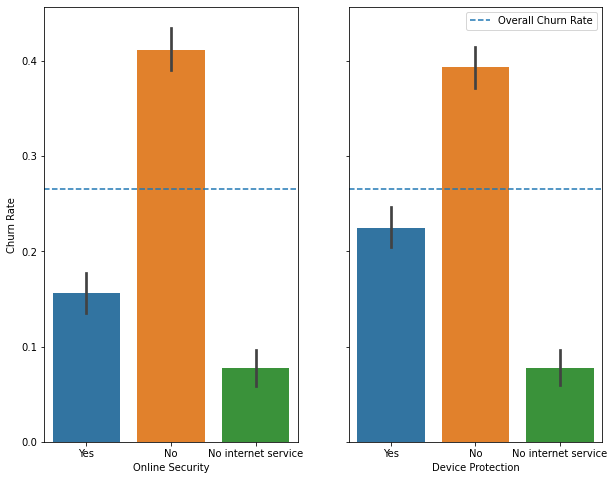

In [14]:
#assign a variable for the overall customer churn rate
churn_mean = train.churn.mean()
#create subplots so two plots can be displayed side by side
fig, ax = plt.subplots(ncols=2, sharey=True, figsize = (10,8))
#create a barplot with online security participation on the x axis and churn rate on the y axis
sns.barplot(x='online_security', y='churn', data=train, ax=ax[0])
#create a barplot with device protection participation on the x axis and churn rate in the y axis
sns.barplot(x='device_protection', y='churn', data=train, ax=ax[1])
#add overall churn rate lines to both plots
ax[0].axhline(churn_mean, label='Overall Churn Rate', linestyle='--')
plt.axhline(churn_mean, label='Overall Churn Rate', linestyle='--')
#add axis labels to both plots
ax[0].set_xlabel('Online Security')
ax[0].set_ylabel('Churn Rate')
plt.xlabel('Device Protection')
plt.ylabel('')
#show the plot legend
plt.legend()
#show the plot
plt.show()

**Hypothesis:**

- H0: Customer participation in our security and protection programs is independent of customer churn

- Ha: customer participation in our security and protection programs is not independent of customer churn

##### Statistical testing - Chi-2

In [15]:
#cross tabulate the data so relational comparisons can be made
secur_cross = pd.crosstab(train.churn, train.online_security)
#view the cross tabulated data
secur_cross

online_security,No,No internet service,Yes
churn,,,
0,1145,783,969
1,801,66,179


In [16]:
#run the chi-2 test on the above cross tabulated data
chi2, p, degf, expected = stats.chi2_contingency(secur_cross)
#view the results
print('Observed\n')
print(internet_cross.values)
print('-------------------\nExpected\n')
print(expected.astype(int))
print('-------------------\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('-------------------\n')
alpha = 0.01
if p < alpha:
    print('We reject the null hypothesis because participation in our security and protection programs is not independent of customer churn')

Observed

[[1095 1019  783]
 [ 254  726   66]]
-------------------
Expected

[[1429  623  843]
 [ 516  225  304]]
-------------------

chi^2 = 437.4420
p     = 0.0000
-------------------

We reject the null hypothesis because participation in our security and protection programs is not independent of customer churn



**Question 4 Takeaways:**
- Customers who do not participate in our online security and/or our device protection programs had a higher churn rate than those that did participate and a higher churn rate than the overall customer churn rate

- Statistical testing showed that customer participation in our security and protection programs is not independent of customer churn rate

---

### Data Modeling

**Training and Validating the models**
- Features to be used in the modeling phase were selected using the most significant variables related to customer churn found during visualization and statistical testing in the exploration phase

In [17]:
#assign the selected features to a variable that can be used in the modeling phase
x_cols = ['tech_support_No internet service', 
          'tech_support_Yes', 'online_security_No internet service', 
          'online_backup_No internet service', 'online_security_Yes', 'online_backup_Yes', 
          'device_protection_No internet service', 'device_protection_Yes', 'internet_service_type_Fiber optic', 
          'internet_service_type_None', 'pay_credit', 'pay_mail', 'pay_elec']

In [18]:
#assign x and y variables for the train dataset
x_train = train[x_cols]
y_train = train[['churn']]
#assign x and y variables for the validate dataset
x_val = validate[x_cols]
y_val = validate[['churn']]
#assign x and y variables for the test dataset
x_test = test[x_cols]
y_test = test[['churn']]

---

**Evaluate the baseline**
- A baseline churn value of 'no churn' or '0' was selected because it was the most frequently observed churn value in the original dataset.

In [21]:
#add a column with the baseline value of '0' for all observations
y_train['baseline'] = 0
#calculate the accuracy score for baseline values
baseline_eval = accuracy_score(y_train.churn, y_train.baseline)
#view the baseline accuracy score
baseline_eval

0.7347197565305605

In [23]:
#drop the created baseline column for ease of further model creation
y_train = y_train.drop(columns='baseline')
#verify column drop
y_train.head()

,churn
5310,0
3790,0
4398,0
2635,0
2986,0


---

**Decision Tree Model**
- The decision tree model was created and fit with the x and y train variables including the above features

- The model was then evaluated with a series of different parameters including max depth values from 1 to 10 to determine which model performed the best

- Performance of the model increased as max depth went up from 1 through 8 and then it stared to drop off so a max depth of 8 was used for the final versoin of this model.

- The model was then validated using the above x and y validate variables


In [24]:
#Create the decision tree model and set the best performing max depth 
#as well as a random state so that the results can be replicated
tree = DecisionTreeClassifier(max_depth=8, random_state=123)
#fit the model with the above selected features
tree.fit(x_train, y_train)
#make predictions with the model
y_pred = tree.predict(x_train)
#create a classification report dataframe that contains performance metrics for the model with the train dataset
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.814041,0.900587,0.855129,2897.000000
1,0.609756,0.430210,0.504484,1046.000000
accuracy,0.775805,0.775805,0.775805,0.775805
macro avg,0.711898,0.665399,0.679807,3943.000000
weighted avg,0.759848,0.775805,0.762110,3943.000000


In [25]:
#validate the model's performance by making predictions with the validate dataset
y_val_pred = tree.predict(x_val)
#create a classification report dataframe that contains performance metrics for the model with the validate dataset
pd.DataFrame(classification_report(y_val, y_val_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.820762,0.884863,0.851608,1242.000000
1,0.593750,0.465479,0.521848,449.000000
accuracy,0.773507,0.773507,0.773507,0.773507
macro avg,0.707256,0.675171,0.686728,1691.000000
weighted avg,0.760485,0.773507,0.764049,1691.000000


---

**K-Nearest Neighbor Model**
- The KNN model was created and fit with the x and y train variables including the above features

- The model was then evaluated with a series of different parameters including n_neighbors values from 1 to 20 to determine which model performed the best

- Performance of the model increased as n_neighbors went up from 1 through 5 and then it stared to drop off so a n_neighbors value of 5 was used for the final version of this model.

- The model was then validated using the above x and y validate variables

In [26]:
#create the KNN model with a n_neighbors value of 5
clf = KNN(n_neighbors=5)
#fit the model with the above x and y train variables
clf.fit(x_train, y_train)
#make predictions with the model
y_pred = clf.predict(x_train)
#create a classification report dataframe that contains performance metrics for the model with the train dataset
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.827839,0.858129,0.842712,2897.000000
1,0.562766,0.505736,0.532729,1046.000000
accuracy,0.764646,0.764646,0.764646,0.764646
macro avg,0.695302,0.681933,0.687720,3943.000000
weighted avg,0.757520,0.764646,0.760480,3943.000000


In [27]:
#validate the model's performance by making predictions with the validate dataset
y_val_pred = clf.predict(x_val)
##create a classification report dataframe that contains performance metrics for the model with the validate dataset
pd.DataFrame(classification_report(y_val, y_val_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.838529,0.844605,0.841556,1242.00000
1,0.561364,0.550111,0.555681,449.00000
accuracy,0.766410,0.766410,0.766410,0.76641
macro avg,0.699946,0.697358,0.698618,1691.00000
weighted avg,0.764935,0.766410,0.765650,1691.00000


---

**Logistic Regression Model**
- The Logistic Regression model was created and fit with the x and y train variables including the above features

- The model was then evaluated with a series of different parameters including C values of 0.1, 0.5, 1, 10, and 100 to determine which model performed the best

- The logistic regression model performed the best with a C value of 1

- The model was then validated using the above x and y validate variables

In [28]:
#create the logistic regression model with a c value of 1 
#and a random state value so that the results can be reproduced
logit = LogisticRegression(C=1, random_state=123)
#fit the model with the above x and y train variables
logit.fit(x_train, y_train)
#make predictions with the model
y_pred = logit.predict(x_train)
#create a classification report dataframe that contains performance metrics for the model with the train dataset
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.803338,0.913704,0.854974,2897.000000
1,0.614198,0.380497,0.469894,1046.000000
accuracy,0.772255,0.772255,0.772255,0.772255
macro avg,0.708768,0.647100,0.662434,3943.000000
weighted avg,0.753163,0.772255,0.752820,3943.000000


In [29]:
#valideate the performance of the model by making predictions with the x and y validate variables
y_val_pred = logit.predict(x_val)
#create a classification report dataframe that contains performance metrics for the model with the validate dataset
pd.DataFrame(classification_report(y_val, y_val_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.802847,0.908213,0.852286,1242.000000
1,0.601399,0.383073,0.468027,449.000000
accuracy,0.768776,0.768776,0.768776,0.768776
macro avg,0.702123,0.645643,0.660156,1691.000000
weighted avg,0.749358,0.768776,0.750256,1691.000000


---

##### Best model selection:
- All three models performed better than baseline (accuracy of 0.73) with accuracy values from 0.76 to 0.78 on the train dataset

- All three models had similar accuracy on the validate dataset only differing by 0.01 (0.77 to 0.78

- Since missing the chance (false negative) to offer more support or services to a customer that churns presents the most costly result, we want to control for recall

- The KNN model had a notably higher recall value which would control for false negatives so that model was chosen as the final model and tested with the test dataset


**Evaluate the selected model with test data**

In [30]:
#make predictions with the above KNN model and the x and y test variables
y_test_pred = clf.predict(x_test)
#create a classification report dataframe that contains performance metrics for the model with the validate dataset
pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.829524,0.841546,0.835492,1035.000000
1,0.543175,0.521390,0.532060,374.000000
accuracy,0.756565,0.756565,0.756565,0.756565
macro avg,0.686350,0.681468,0.683776,1409.000000
weighted avg,0.753517,0.756565,0.754950,1409.000000


#### Key Findings 
- Customer Payment type:
    - Customers with the electronic check payment method had a higher churn rate than those with other payment methods and a higher churn rate than the overall customer churn rate.
        
    - Statistical testing showed that customer payment type is not independent of customer churn rate
    
- Internet Service Type:
    - Customers with fiber optic internet service had a higher curn rate than those with other internet service types and a higher churn rate than the overall customer churn rate
    
    - Statistical testing showed that customer internet service type is not independent of customer churn rate
    
- Participation in Support and Backup Programs:
    - Customers who do not participate in our tech support and/or our online backup programs had a higher churn rate than those that did participate and a higher churn rate than the overall customer churn rate
    
    - Statistical testing showed that customer participation in our support and backup programs is not independent of customer churn rate
    
- Participation in Security and Protection Programs:
    - Customers who do not participate in our online security and/or our device protection programs had a higher churn rate than those that did participate and a higher churn rate than the overall customer churn rate
    
    - Statistical testing showed that customer participation in our security and protection programs is not independent of customer churn rate
    
- Predictive Modeling (machine learning):
    - The best performing model was a K-Nearest Neighbors model with a n-neighbors value of 5
    
    - The final test of this model on the 'test' dataset produced an accuracy score of .76 which is 3% above baseline values and a recall score of .53 which was notably higher than the recall value of the other models in the validate stage

#### Recomendations
- For churn rate related to customer payment type I reccomend incentivizing customers to switch to one of our two automatic payment methods

- For churn rate related to internet service type I recommend first collecting more information on customer opinion of our fiber optic internet service. Since this is a better quality service than the dsl it is suprising that customers with this type of service have a significantly higher churn rate. There may also be a connection between fiber optic service issues and customers not participating in tech support to get things fixed.

- For particiaption in our support/backup and our security//protection programs I reccomend we focus on marketing targeted at increased customer participation and engagement


#### Next Steps - If I had more time I would:
- Since our highest performing model had an accuracy score only 3% higher than baseline the focus of further work would be on refining the model to increase predictive accuracy

- To do this:
    - I would use the data/information produced from the above recomended actions to bolster our understanding of drivers of customer churn and to refine our machine learning models to better predict customer churn

    - I would further investigate features and feature engineering that could help increase our model's predictive accuracy

    - I would further investigate the interrelationship of customer features could produce additional drivers of customer churn and actionable items to reduce that churn